In [1]:
import os
import sys
sys.path.append('utils')
from dataset.spot import DailyDataset, get_loader, SPOT, TOTAL_STD, TOTAL_MEAN
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd

%matplotlib inline

In [2]:
data=SPOT['2016':'2016-06'].values

In [3]:
result=seasonal_decompose(data, model='additive', filt=None, freq=168, two_sided=True, 
#                           extrapolate_trend=168,
                         )

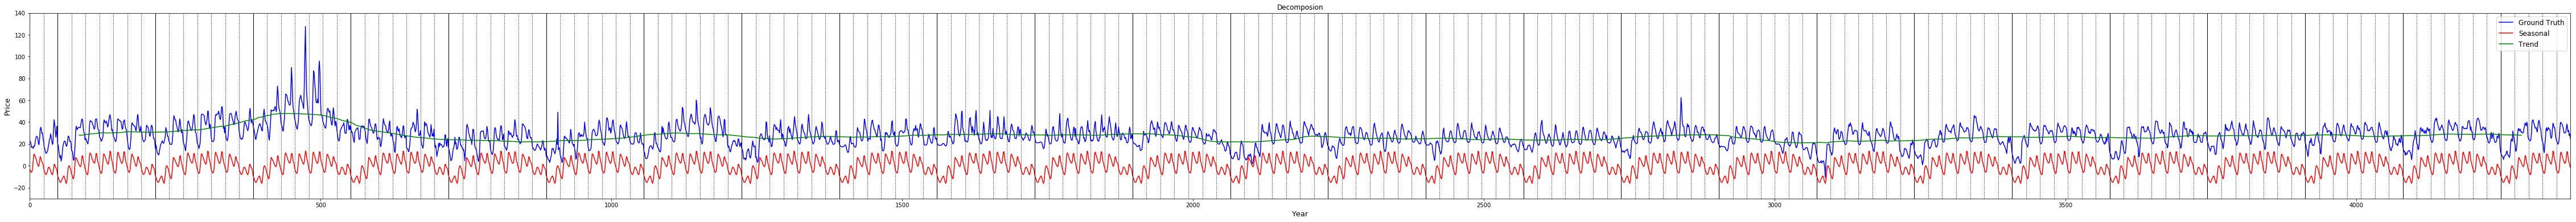

In [4]:
x=np.linspace(1, 182*24, 182*24)
plt.figure(figsize=(80,6))
plt.plot(x, data, color='blue', label='Ground Truth')
plt.plot(x, result.seasonal, color='red', label='Seasonal')
plt.plot(x, result.trend, color='green', label='Trend')

plt.legend(fontsize='large') # 显示图例

plt.title('Decomposion')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Price',fontsize=13)
plt.xlim(0,182*24)
plt.ylim(-30,140)

plt.vlines(np.array(range(1, 182, 1))*24, ymax=140, ymin=-30, linestyle=':', linewidth=1)
plt.vlines(np.array(range(2, 182, 7))*24, ymax=140, ymin=-30, linestyle='-', linewidth=1)
# plt.savefig('./figures/day decomposion by stl.jpg', bbox_inches='tight')

plt.show()

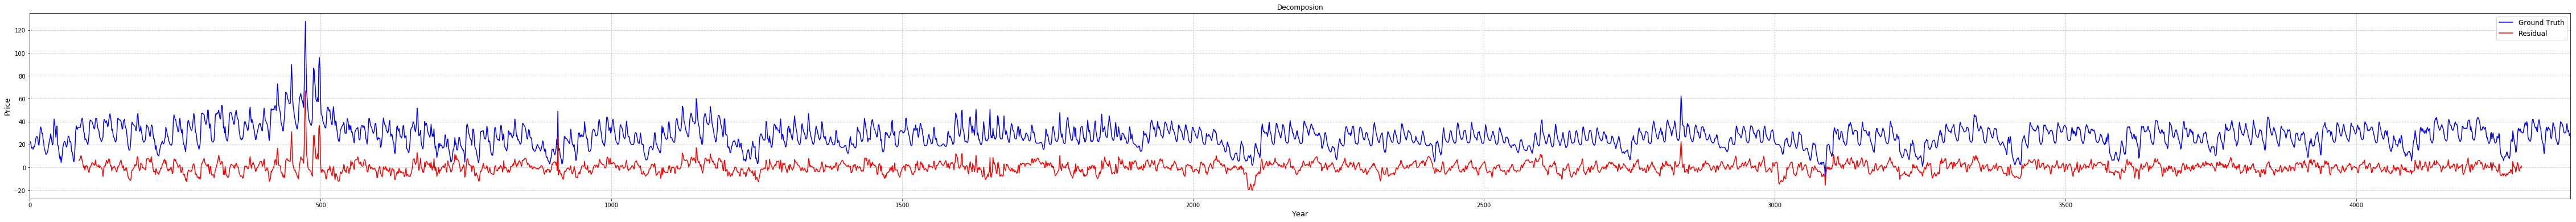

In [5]:
x=np.linspace(1, 182*24, 182*24)
plt.figure(figsize=(80,6))
plt.plot(x, data, color='blue', label='Ground Truth')
plt.plot(x, result.resid, color='red', label='Residual')

plt.legend(fontsize='large') # 显示图例

plt.title('Decomposion')
plt.xlabel('Year',fontsize=13)
plt.ylabel('Price',fontsize=13)
plt.xlim(0,182*24)

plt.grid(linestyle=':', linewidth=1)

plt.show()

# 失败案例

In [6]:
data1=SPOT['2016':'2016-06'].values[:504] # 3 weeks
data2=SPOT['2016':'2016-06'].values[:672] # 4 weeks
x1=np.linspace(1, 504, 504)
x2=np.linspace(1, 672, 672)

In [7]:
result1=seasonal_decompose(data1, model='additive', filt=None, freq=168, two_sided=True, 
#                           extrapolate_trend=168,
                         )
result2=seasonal_decompose(data2, model='additive', filt=None, freq=168, two_sided=True,
#                           extrapolate_trend=168,
                         )

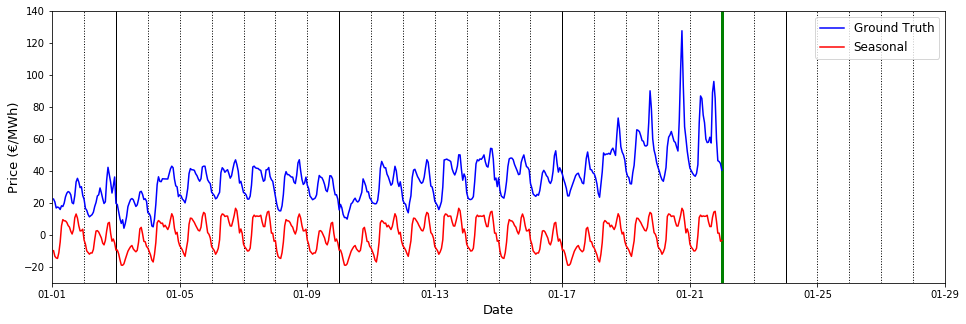

In [8]:
plt.figure(figsize=(16, 5))
plt.plot(x1, data1, color='blue', label='Ground Truth')
plt.plot(x1, result1.seasonal, color='red', label='Seasonal')
plt.xlabel('Date',fontsize=13)
plt.ylabel('Price (€/MWh)',fontsize=13)
plt.legend(fontsize='large') # 显示图例
plt.xlim(0,672)
plt.ylim(-30,140)

plt.vlines(np.array(range(1, 28, 1))*24, ymax=140, ymin=-30, linestyle=':', linewidth=1)
plt.vlines(np.array(range(2, 28, 7))*24, ymax=140, ymin=-30, linestyle='-', linewidth=1)
plt.vlines(504, ymax=140, ymin=-30, linestyle='-', linewidth=3,colors='green')
plt.xticks(np.array(range(0, 29, 4))*24, ['01-01','01-05','01-09','01-13','01-17','01-21','01-25','01-29'])
plt.savefig('./figures/stl_price_1.jpg',bbox_inches='tight')

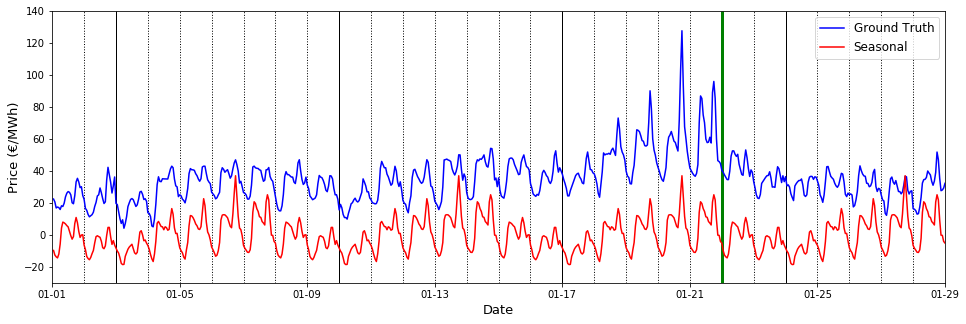

In [9]:
plt.figure(figsize=(16, 5))
plt.plot(x2, data2, color='blue', label='Ground Truth')
plt.plot(x2, result2.seasonal, color='red', label='Seasonal')
plt.xlabel('Date',fontsize=13)
plt.ylabel('Price (€/MWh)',fontsize=13)
plt.legend(fontsize='large') # 显示图例
plt.xlim(0,672)
plt.ylim(-30,140)

plt.vlines(np.array(range(1, 28, 1))*24, ymax=140, ymin=-30, linestyle=':', linewidth=1)
plt.vlines(np.array(range(2, 28, 7))*24, ymax=140, ymin=-30, linestyle='-', linewidth=1)
plt.vlines(504, ymax=140, ymin=-30, linestyle='-', linewidth=3,colors='green')
plt.xticks(np.array(range(0, 29, 4))*24, ['01-01','01-05','01-09','01-13','01-17','01-21','01-25','01-29'])
plt.savefig('./figures/stl_price_2.jpg',bbox_inches='tight')

In [10]:
# 实时性不佳，存在明显滞后

In [11]:
data=SPOT['2015-12-11':'2016-06'].values

In [12]:
seasonal = np.array([])
trend = np.array([])

In [13]:
for i in range(1, 183):
    result=seasonal_decompose(data[i*24:(21+i)*24], model='additive', filt=None, freq=168, two_sided=True, 
                              extrapolate_trend=168,
                             )
    seasonal=np.append(seasonal, result.seasonal[-24:])
    trend=np.append(trend, result.trend[-24:])
residual=SPOT['2016':'2016-06'].values-seasonal-trend

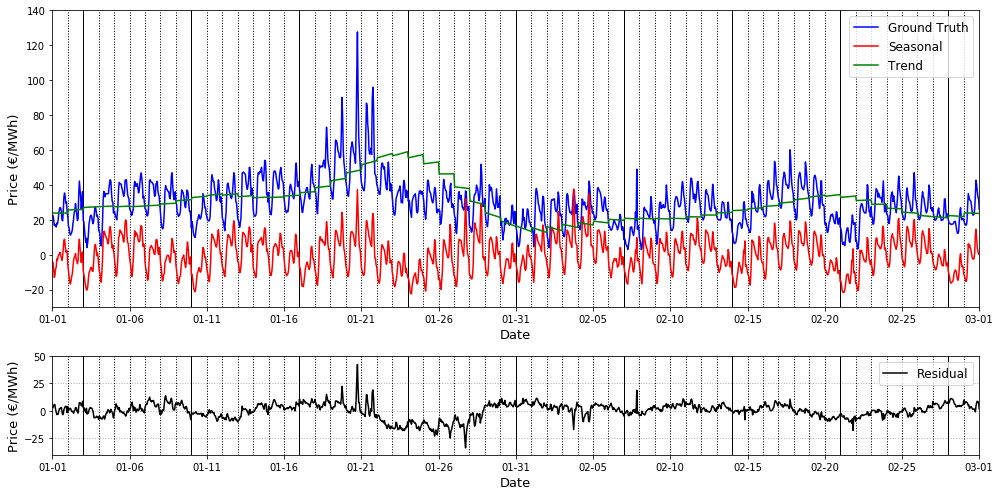

In [14]:
x=np.linspace(1, 60*24, 60*24)
fig = plt.figure(figsize=(14,7)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax1 = plt.subplot(gs[0]) 
ax1.plot(x, SPOT['2016':'2016-02'].values, color='blue', label='Ground Truth')
ax1.plot(x, seasonal[:60*24], color='red', label='Seasonal')
ax1.plot(x, trend[:60*24], color='green', label='Trend')

ax1.legend(fontsize='large') # 显示图例

ax1.set_xlabel('Date',fontsize=13)
ax1.set_ylabel('Price (€/MWh)',fontsize=13)
ax1.set_xlim(0,60*24)
ax1.set_ylim(-30,140)
ax1.vlines(np.array(range(1, 60, 1))*24, ymax=140, ymin=-30, linestyle=':', linewidth=1)
ax1.vlines(np.array(range(2, 60, 7))*24, ymax=140, ymin=-30, linestyle='-', linewidth=1)
ax1.set_xticks(np.array(range(0, 61, 5))*24) 
ax1.set_xticklabels(['01-01','01-06','01-11','01-16','01-21','01-26','01-31','02-05','02-10','02-15','02-20','02-25','03-01'])


ax2 = plt.subplot(gs[1]) 
ax2.plot(x, residual[:60*24], color='black', label='Residual')
ax2.legend(fontsize='large') # 显示图例
ax2.set_xlim(0,60*24)
ax2.set_ylim(-40,50)
ax2.vlines(np.array(range(1, 60, 1))*24, ymax=50, ymin=-40, linestyle=':', linewidth=1)
ax2.vlines(np.array(range(2, 60, 7))*24, ymax=50, ymin=-40, linestyle='-', linewidth=1)
ax2.set_xticks(np.array(range(0, 61, 5))*24)
ax2.set_xticklabels(['01-01','01-06','01-11','01-16','01-21','01-26','01-31','02-05','02-10','02-15','02-20','02-25','03-01'])
ax2.set_xlabel('Date',fontsize=13)
ax2.set_ylabel('Price (€/MWh)',fontsize=13)
ax2.grid(linestyle=':', linewidth=1)
plt.tight_layout() 

plt.savefig('./figures/stl_price_1&2_.jpg',bbox_inches='tight')
plt.show()

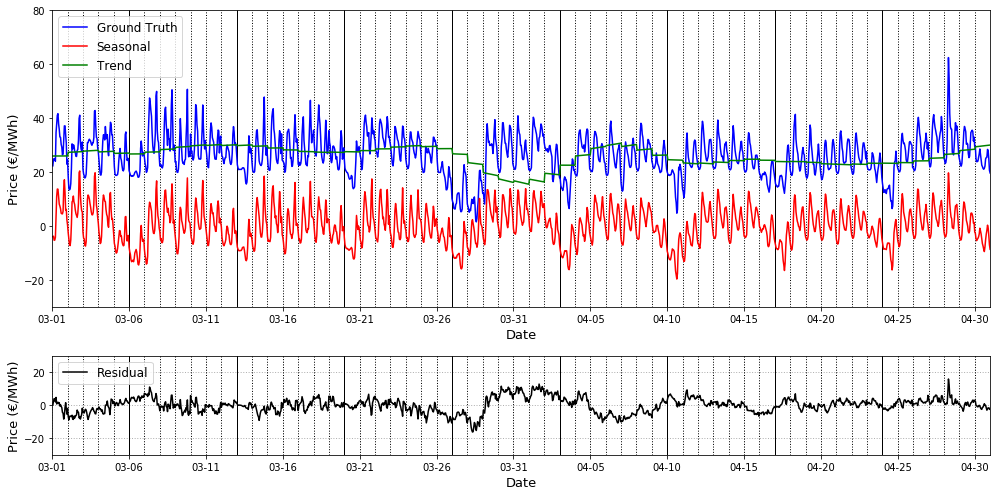

In [15]:
x=np.linspace(1, 61*24, 61*24)
fig = plt.figure(figsize=(14,7)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax1 = plt.subplot(gs[0]) 
ax1.plot(x, SPOT['2016-03':'2016-04'].values, color='blue', label='Ground Truth')
ax1.plot(x, seasonal[60*24:121*24], color='red', label='Seasonal')
ax1.plot(x, trend[60*24:121*24], color='green', label='Trend')

ax1.legend(fontsize='large') # 显示图例

ax1.set_xlabel('Date',fontsize=13)
ax1.set_ylabel('Price (€/MWh)',fontsize=13)
ax1.set_xlim(0,61*24)
ax1.set_ylim(-30,80)
ax1.vlines(np.array(range(1, 61, 1))*24, ymax=80, ymin=-30, linestyle=':', linewidth=1)
ax1.vlines(np.array(range(5, 61, 7))*24, ymax=80, ymin=-30, linestyle='-', linewidth=1)
ax1.set_xticks(np.array(range(0, 62, 5))*24) 
ax1.set_xticklabels(['03-01','03-06','03-11','03-16','03-21','03-26','03-31','04-05','04-10','04-15','04-20','04-25','04-30'])


ax2 = plt.subplot(gs[1]) 
ax2.plot(x, residual[60*24:121*24], color='black', label='Residual')
ax2.legend(fontsize='large') # 显示图例
ax2.set_xlim(0,61*24)
ax2.set_ylim(-30,30)
ax2.vlines(np.array(range(1, 61, 1))*24, ymax=30, ymin=-30, linestyle=':', linewidth=1)
ax2.vlines(np.array(range(5, 61, 7))*24, ymax=30, ymin=-30, linestyle='-', linewidth=1)
ax2.set_xticks(np.array(range(0, 62, 5))*24)
ax2.set_xticklabels(['03-01','03-06','03-11','03-16','03-21','03-26','03-31','04-05','04-10','04-15','04-20','04-25','04-30'])
ax2.set_xlabel('Date',fontsize=13)
ax2.set_ylabel('Price (€/MWh)',fontsize=13)
ax2.grid(linestyle=':', linewidth=1)
plt.tight_layout() 

plt.savefig('./figures/stl_price_3&4.jpg',bbox_inches='tight')
plt.show()

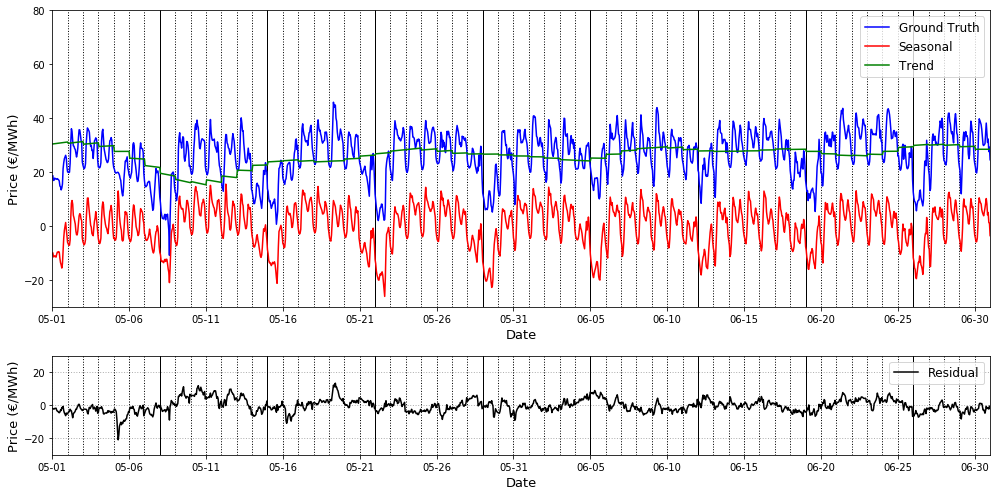

In [16]:
x=np.linspace(1, 61*24, 61*24)
fig = plt.figure(figsize=(14,7)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax1 = plt.subplot(gs[0]) 
ax1.plot(x, SPOT['2016-05':'2016-06'].values, color='blue', label='Ground Truth')
ax1.plot(x, seasonal[121*24:182*24], color='red', label='Seasonal')
ax1.plot(x, trend[121*24:182*24], color='green', label='Trend')

ax1.legend(fontsize='large') # 显示图例

ax1.set_xlabel('Date',fontsize=13)
ax1.set_ylabel('Price (€/MWh)',fontsize=13)
ax1.set_xlim(0,61*24)
ax1.set_ylim(-30,80)
ax1.vlines(np.array(range(1, 61, 1))*24, ymax=80, ymin=-30, linestyle=':', linewidth=1)
ax1.vlines(np.array(range(7, 61, 7))*24, ymax=80, ymin=-30, linestyle='-', linewidth=1)
ax1.set_xticks(np.array(range(0, 62, 5))*24) 
ax1.set_xticklabels(['05-01','05-06','05-11','05-16','05-21','05-26','05-31','06-05','06-10','06-15','06-20','06-25','06-30'])


ax2 = plt.subplot(gs[1]) 
ax2.plot(x, residual[121*24:182*24], color='black', label='Residual')
ax2.legend(fontsize='large') # 显示图例
ax2.set_xlim(0,61*24)
ax2.set_ylim(-30,30)
ax2.vlines(np.array(range(1, 61, 1))*24, ymax=30, ymin=-30, linestyle=':', linewidth=1)
ax2.vlines(np.array(range(7, 61, 7))*24, ymax=30, ymin=-30, linestyle='-', linewidth=1)
ax2.set_xticks(np.array(range(0, 62, 5))*24)
ax2.set_xticklabels(['05-01','05-06','05-11','05-16','05-21','05-26','05-31','06-05','06-10','06-15','06-20','06-25','06-30'])
ax2.set_xlabel('Date',fontsize=13)
ax2.set_ylabel('Price (€/MWh)',fontsize=13)
ax2.grid(linestyle=':', linewidth=1)
plt.tight_layout() 

plt.savefig('./figures/stl_price_5&6.jpg',bbox_inches='tight')
plt.show()

# 一次画3个月

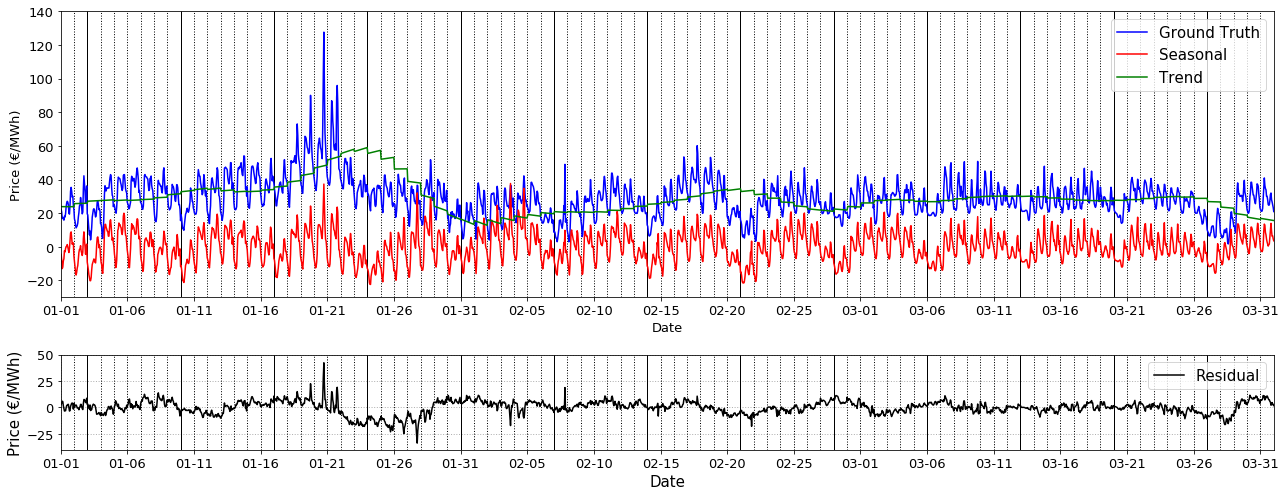

In [147]:
x=np.linspace(1, 91*24, 91*24)
fig = plt.figure(figsize=(18,7)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax1 = plt.subplot(gs[0]) 
ax1.plot(x, SPOT['2016':'2016-03'].values, color='blue', label='Ground Truth')
ax1.plot(x, seasonal[:91*24], color='red', label='Seasonal')
ax1.plot(x, trend[:91*24], color='green', label='Trend')

ax1.legend(fontsize=15) # 显示图例

ax1.set_xlabel('Date',fontsize=13)
ax1.set_ylabel('Price (€/MWh)',fontsize=13)
ax1.set_xlim(0,91*24)
ax1.set_ylim(-30,140)
ax1.vlines(np.array(range(1, 91, 1))*24, ymax=140, ymin=-30, linestyle=':', linewidth=1)
ax1.vlines(np.array(range(2, 91, 7))*24, ymax=140, ymin=-30, linestyle='-', linewidth=1)
ax1.set_xticks(np.array(range(0, 92, 5))*24) 
ax1.set_xticklabels(['01-01','01-06','01-11','01-16','01-21','01-26','01-31','02-05','02-10','02-15','02-20','02-25','03-01','03-06','03-11','03-16','03-21','03-26','03-31'])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

ax2 = plt.subplot(gs[1]) 
ax2.plot(x, residual[:91*24], color='black', label='Residual')
ax2.legend(fontsize=15) # 显示图例
ax2.set_xlim(0,91*24)
ax2.set_ylim(-40,50)
ax2.vlines(np.array(range(1, 91, 1))*24, ymax=50, ymin=-40, linestyle=':', linewidth=1)
ax2.vlines(np.array(range(2, 91, 7))*24, ymax=50, ymin=-40, linestyle='-', linewidth=1)
ax2.set_xticks(np.array(range(0, 92, 5))*24)
ax2.set_xticklabels(['01-01','01-06','01-11','01-16','01-21','01-26','01-31','02-05','02-10','02-15','02-20','02-25','03-01','03-06','03-11','03-16','03-21','03-26','03-31'])
ax2.set_xlabel('Date',fontsize=15)
ax2.set_ylabel('Price (€/MWh)',fontsize=15)
ax2.grid(linestyle=':', linewidth=1)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.tight_layout() 

# plt.savefig('./stl_price_1&2&3_.jpg',bbox_inches='tight', dpi=400)
plt.show()

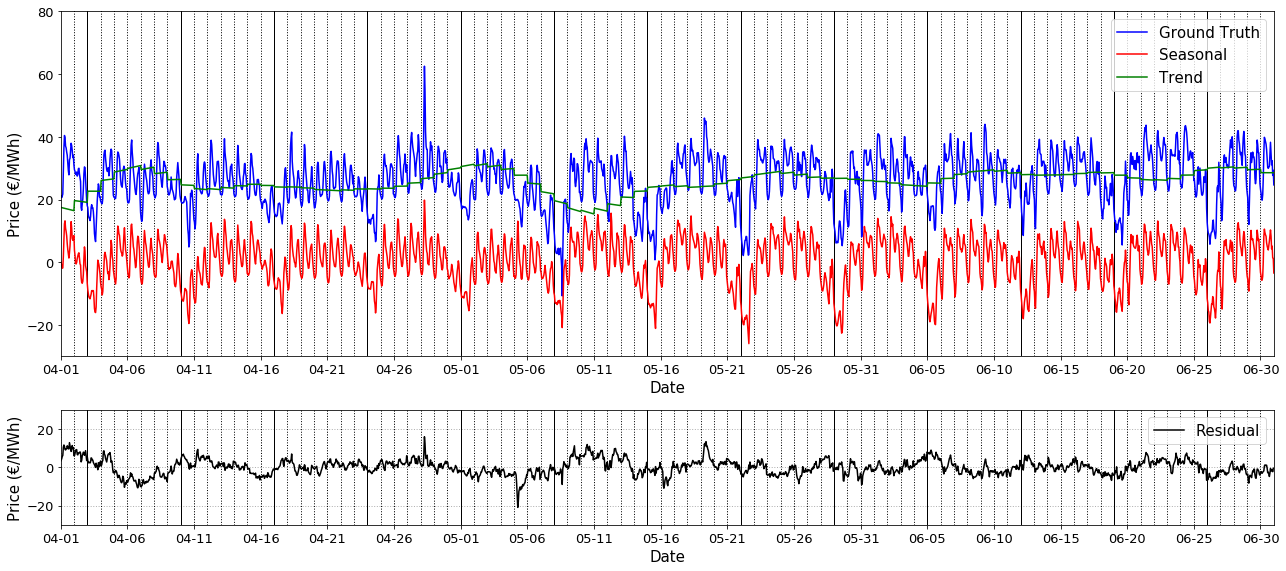

In [148]:
x=np.linspace(1, 91*24, 91*24)
fig = plt.figure(figsize=(18,8)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax1 = plt.subplot(gs[0]) 
ax1.plot(x, SPOT['2016-04':'2016-06'].values, color='blue', label='Ground Truth')
ax1.plot(x, seasonal[91*24:], color='red', label='Seasonal')
ax1.plot(x, trend[91*24:], color='green', label='Trend')

ax1.legend(fontsize=15) # 显示图例

ax1.set_xlabel('Date',fontsize=15)
ax1.set_ylabel('Price (€/MWh)',fontsize=15)
ax1.set_xlim(0,91*24)
ax1.set_ylim(-30,80)
ax1.vlines(np.array(range(1, 91, 1))*24, ymax=140, ymin=-30, linestyle=':', linewidth=1)
ax1.vlines(np.array(range(2, 91, 7))*24, ymax=140, ymin=-30, linestyle='-', linewidth=1)
ax1.set_xticks(np.array(range(0, 92, 5))*24) 
ax1.set_xticklabels(['04-01','04-06','04-11','04-16','04-21','04-26','05-01','05-06','05-11','05-16','05-21','05-26','05-31','06-05','06-10','06-15','06-20','06-25','06-30'])
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

ax2 = plt.subplot(gs[1]) 
ax2.plot(x, residual[91*24:], color='black', label='Residual')
ax2.legend(fontsize=15) # 显示图例
ax2.set_xlim(0,91*24)
ax2.set_ylim(-30,30)
ax2.vlines(np.array(range(1, 91, 1))*24, ymax=60, ymin=-30, linestyle=':', linewidth=1)
ax2.vlines(np.array(range(2, 91, 7))*24, ymax=60, ymin=-30, linestyle='-', linewidth=1)
ax2.set_xticks(np.array(range(0, 92, 5))*24)
ax2.set_xticklabels(['04-01','04-06','04-11','04-16','04-21','04-26','05-01','05-06','05-11','05-16','05-21','05-26','05-31','06-05','06-10','06-15','06-20','06-25','06-30'])
ax2.set_xlabel('Date',fontsize=15)
ax2.set_ylabel('Price (€/MWh)',fontsize=15)
ax2.grid(linestyle=':', linewidth=1)
plt.tight_layout() 

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# plt.savefig('./stl_price_4&5&6_.jpg',bbox_inches='tight', dpi=400)
plt.show()

# Toy example

In [18]:
x = np.arange(0,100,0.1)
raw_data = 20*np.sin(np.pi*x/10) + np.random.random(x.shape) + x/5

In [19]:
raw_data.shape

(1000,)

In [20]:
rst = seasonal_decompose(raw_data, model='additive', filt=None, freq=200, two_sided=True)

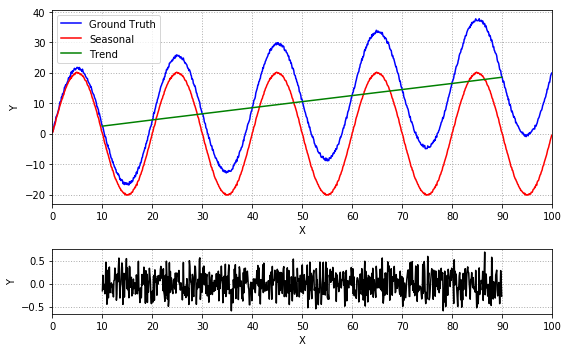

In [21]:
fig = plt.figure(figsize=(8, 5)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
ax1 = plt.subplot(gs[0]) 
ax1.plot(x, raw_data, color='blue', label='Ground Truth')
ax1.plot(x, rst.seasonal, color='red', label='Seasonal')
ax1.plot(x, rst.trend, color='green', label='Trend')
ax1.set_xlim(0,100)
ax1.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax1.set_xlabel('X',fontsize=10)
ax1.set_ylabel('Y',fontsize=10)
ax1.legend() # 显示图例
ax1.grid(linestyle=':', linewidth=1)

ax2 = plt.subplot(gs[1]) 
ax2.plot(x, rst.resid, color='black', label='Residual')
ax2.set_xlim(0,100)
ax2.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax2.set_xlabel('X',fontsize=10)
ax2.set_ylabel('Y',fontsize=10)
ax2.grid(linestyle=':', linewidth=1)
plt.tight_layout() 

plt.savefig('./figures/stl_toy_add.jpg',bbox_inches='tight')


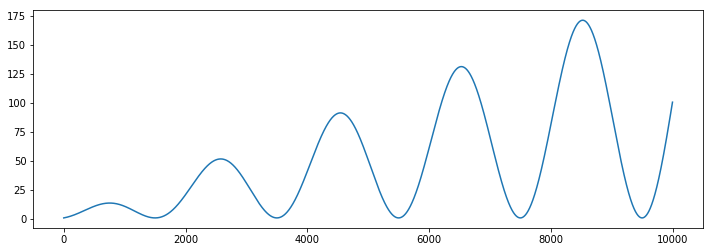

In [99]:
x = np.arange(0,100,0.01)
# arr = np.log(x*np.sin(x)**2+0.1)
arr = x*np.sin(0.1*np.pi*x)+x+1

plt.figure(figsize=(12,4))
plt.plot(arr)

In [100]:
res = seasonal_decompose(arr, model="multiplicative", freq=2000)

Text(0.5, 0, 'x')

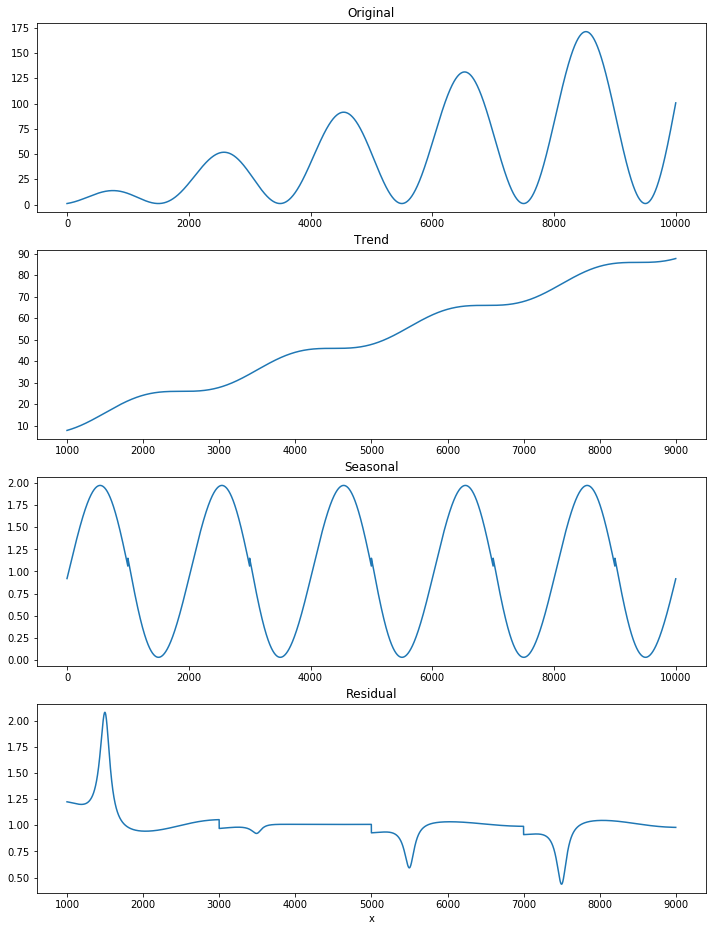

In [101]:
_, axes = plt.subplots(4,1,figsize=(12,16))
axes[0].plot(arr)
axes[1].plot(res.trend)
axes[2].plot(res.seasonal)
axes[3].plot(res.resid)
axes[0].set_title("Original")
axes[1].set_title("Trend")
axes[2].set_title("Seasonal")
axes[3].set_title("Residual")
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('x')